In [2]:
from sedaro import SedaroApiClient
from pprint import pprint

API_KEY = "PKDqMrtcTK4plJgL7qVlQD.0xQph1lyKzd-pV0-ZL7bRIH7BX54Yjqbz6tluwut3Hvp8XE-RVbfHSz2o5vC77scUhg2xBFuBybplxY6FyXXMQ"
TEMP_AGENT_REPO_BRANCH_ID = "PS5ZPCp6mh5yXLH3lkCWFj" # Specific Repo of the Templated agent 
SCENARIO_BRANCH_VERSION_ID = "PRx5rSwrGfkK4n9vFXmVbt" # Version 2
WORKSPACE_ID = "PQtnGZNNPdzZM5JdVhP5P9" # Violet/Ethreal workspace

# Define modules
sedaro = SedaroApiClient(api_key = API_KEY)
# agent template is only for satellite model (agent), and don't copy the model repo ID, only the branch ID (version)
scenario_branch = sedaro.scenario(SCENARIO_BRANCH_VERSION_ID)
agent_template_branch = sedaro.agent_template(TEMP_AGENT_REPO_BRANCH_ID)

/Users/hubertliu/Library/Python/3.9/lib/python/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.27.2 is exactly one major version older than the runtime version 6.31.1 at cosim.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(


In [ ]:
print(scenario_branch.TemplatedAgent.get_all())
print(scenario_branch.PeripheralAgent.get_all())




[
TemplatedAgent(
   angularVelocity=None
   annotations={'$': {'subsystem': 'Agents'}}
   attitude=None
   disabled=False
   externalState=[]
   id='PRkHzzmM9MMY9JPfBDd7LC'
   kinematics='PS5ZtmmnWlynTsPKYs5HSd'
   name='My In-orbit Spacecraft'
   position={'eci': [4722.155958392787, 4722.1559583927865, 0.0]}
   targetGroupMapping={}
   targetMapping={'PRknkFRHNYJhkCV8b53CLG': {'associatedTargets': ['PRkndRsqYQpwX9b5mNccvk', 'PS5ZRYkBkbxXXnmGDsyCQ6']}, 'PRx5x67Z7LxtW5RNXvCfwR': {'associatedTargets': ['PRwwslS9wmTbjh3H55nRX7', 'PS5ZRvjGmMkDDHf8CVMpg8']}, 'PRykkzdKj7Mbc2vD2PHq7D': {'associatedTargets': ['PRykkByqkk6x6vJjlRrp4b', 'PS5ZRN4ZPJB3wv89F4kxcw']}}
   templateRef='PS5ZPCp6mh5yXLH3lkCWFj'
   type='TemplatedAgent'
   velocity={'eci': [-5.462937449923098, 5.462937449923099, 0.0]}
)
]
[
PeripheralCelestialPoint(
   angularVelocity=None
   annotations={'$': {'subsystem': 'Agents'}}
   attitude=None
   body='SUN'
   disabled=False
   externalState=[]
   id='PRykkzdKj7Mbc2vD2PHq7D'
   

In [3]:
sim = scenario_branch.simulation
sim_result = sim.results()



Downloading...
...download complete!
Processing downloaded data...


In [ ]:
all_results = sim.results(sampleRate=1)
print(all_results.summarize()) 
for key in all_results.dataframe.keys():
    # each key is a tuple, e.g. ('FooAgent',) or ('FooAgent','GNC')
    print(key)


Downloading...
...download complete!
Processing downloaded data...
---------------------------------------------------------------------------
                      Sedaro Simulation Result Summary                     
---------------------------------------------------------------------------
✅ Simulation succeeded after 128.1s

🛰️ Templated Agents 
    • My In-orbit Spacecraft

📡 Peripheral Agents 
    • My Ground Point
    • Sat 2
---------------------------------------------------------------------------
❓ Query agent results with .agent(<NAME>)
None
PRkHzzmM9MMY9JPfBDd7LC/2
PRkHzzmM9MMY9JPfBDd7LC/0
PRx5x67Z7LxtW5RNXvCfwR/0
PRknkFRHNYJhkCV8b53CLG/0
PRkHzzmM9MMY9JPfBDd7LC/1


---------------------------------------------------------------------------
                   Sedaro Simulation Block Result Summary                  
                                   'root'                                  
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Power
    • Guidance, Navigation, & Control
    • Command & Data Handling

📋 Variables Available
    •   activePointingMode
    •   activeRoutines
    •   angularMomentum
    •   angularMomentumMagnitude
    •   angularVelocity
    •   angularVelocityError
    •   angularVelocitySolution
    •   angularVelocitySolutionError
    •   attitude
    •   attitudeError
    •   attitudeSolution
    •   attitudeSolutionError
    •   attitudeSolutionErrorAngle
    •   cdhTimeStepLimiter
    •   commandedAngularRates
    •   commandedAttitude
    •   controlTorque
    •   definitiveAngularVelocitySolution
    •   definitiveAngularVelocitySolutionError
    •   definitiveAtt

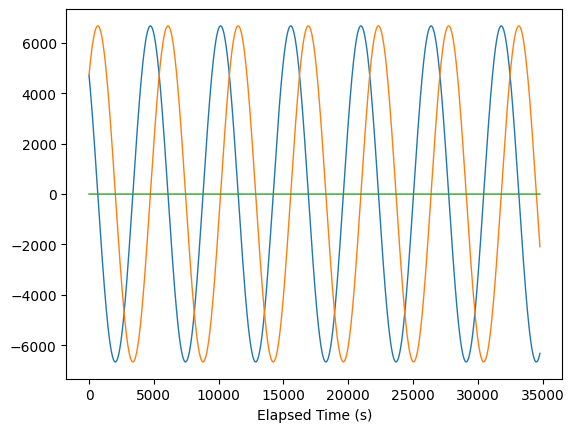

In [ ]:
from app import agent_template_branch


agent = sim_result.agent(sim_result.templated_agents[0])
agent_template_branch.data[""]
block = agent.block('root')
print(block.summarize())

# simple line plot at default sizing
block.position.eci.plot(linewidth=1)


In [4]:
# Simple method for extracting block name from block ID

agent_data = agent_template_branch.data

# pprint(agent_data)

agentDataBlocks = agent_data['blocks']

block_id_to_name = {}
for block_id, block_data in agentDataBlocks.items():
    # print(block_id)
    # print(block_data['name'])
    # print("--------------------------------)
    if 'name' in block_data.keys():
        block_id_to_name[block_id] = block_data['name']
    else:
        block_id_to_name[block_id] = 'Unknown'

pprint(block_id_to_name)


# we also make the reverse name to id mapping

name_to_block_id = {v: k for k, v in block_id_to_name.items()}

pprint(name_to_block_id)







{'NSghWfrUj9OyAK8OBAXa-': 'Battery',
 'NSghYm2RqDibih0igHFc-': 'Default Power Processor',
 'NSghaQGUD5XkZv-hq4TTV': 'Power',
 'NSghcbxRIX9eXogEB0li-': 'Command & Control',
 'NSgheitRQ51bMoH_95sZk': 'Data Handling',
 'NSghgp0ThH8gNv5Ady03k': 'GNC',
 'NSghj1hTM9mz2Vl08G5rk': 'Thermal',
 'NSghkyoTLeQzaNfeeckQV': 'Structure',
 'N_dA5fnT5DwNn40QSKR4V': '+X',
 'N_dAvrMSdmYcjRnM1qKSV': '+Y',
 'N_dB7gWR61wdN8AmaTK9F': '+Z',
 'N_dBDWdUEiQQIB7eb91fV': '-X',
 'N_dBGp6Ri9NCGOtCqElJV': '-Y',
 'N_dBJ7DT1HEtYaCVqbDzV': '-Z',
 'NcT6YjPRD1X2-OCHQVM1F': 'Unknown',
 'PJzkGkkhSMSrtSpL98vSgr': 'Ideal AD Algorithm',
 'PJzkLbHx2W3vg8fmLMCbcs': 'Ideal OD Algorithm',
 'PK3PBjf4t6t8NzB38dfcHg': 'Unknown',
 'PK3PC3RhLz2bxfPgmKkCMv': 'Unknown',
 'PK3PCG3sz3M77RHTgT689V': 'Unknown',
 'PK3PCQdVjMpgKlvtsnydXd': 'Unknown',
 'PK3PCfJQrr3G2jdPskKPVn': 'T-pli 200',
 'PK3PCpCJRn6LpwvhWzNtsb': 'Unknown',
 'PK3PCxH88PX2DzVz6MCyf8': 'Unknown',
 'PK3PG3PNFkJPsPWKkW4tj5': 'C675',
 'PK3PT6mfWX5y7VqkFmqjS3': 'Poly-pad',
 'PK3PZ

---------------------------------------------------------------------------
                   Sedaro Simulation Block Result Summary                  
                                   'root'                                  
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Power
    • Guidance, Navigation, & Control
    • Command & Data Handling

📋 Variables Available
    •   activePointingMode
    •   activeRoutines
    •   angularMomentum
    •   angularMomentumMagnitude
    •   angularVelocity
    •   angularVelocityError
    •   angularVelocitySolution
    •   angularVelocitySolutionError
    •   attitude
    •   attitudeError
    •   attitudeSolution
    •   attitudeSolutionError
    •   attitudeSolutionErrorAngle
    •   cdhTimeStepLimiter
    •   commandedAngularRates
    •   commandedAttitude
    •   controlTorque
    •   definitiveAngularVelocitySolution
    •   definitiveAngularVelocitySolutionError
    •   definitiveAtt

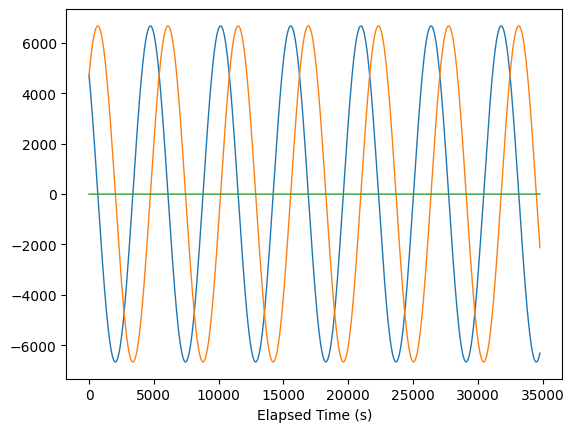

In [19]:

agent = sim_result.agent(sim_result.templated_agents[0])
block = agent.block('root')
print(block.summarize())

# simple line plot at default sizing
block.position.eci.plot(linewidth=1)

In [21]:
print(sim_result.agent("PRx5x67Z7LxtW5RNXvCfwR").summarize())

---------------------------------------------------------------------------
                            Agent Result Summary                           
                                  'Sat 2'                                  
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Guidance, Navigation, & Control

📦 Available Blocks
    -------------------------------------------------------------------------------------------
    |              id                        type                          name               |
    -------------------------------------------------------------------------------------------
    | root                       |                                |                           |
    -------------------------------------------------------------------------------------------
---------------------------------------------------------------------------
❓ Query block results with .block(<ID>) or .block(<PARTIAL_ID>

In [4]:
agent_template = sedaro.agent_template(TEMP_AGENT_REPO_BRANCH_ID)

In [13]:
print(agent_template.block("PS5ZkPsYqsQCh6dFlbmQnZ").data["name"])
print(agent_template.block("PS5ZkPsYqsQCh6dFlbmQnZ").data["type"])

Downlink
LineOfSightTransmitInterface


---------------------------------------------------------------------------
                   Sedaro Simulation Block Result Summary                  
                                 'Battery'                                 
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Power

📋 Variables Available
    • * current
    • * dischargeCurrentMargin
    •   power
    • * soc
    •   voc
    •   voltage
---------------------------------------------------------------------------
❓ Query variables with .<VARIABLE_NAME>
❓ Query statistics with .<VARIABLE_NAME>.stats('<STAT_NAME_1>', '<STAT_NAME_2>', ...)
📊 Variables with statistics available are marked with a *
None
[]
['current', 'dischargeCurrentMargin', 'power', 'soc', 'voc', 'voltage']
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999978503156174, 0.9999390677175999, 0.9998992224457003, 0.9998884205737445, 0.9999002368603007, 0.9999120775779332, 0.99992458

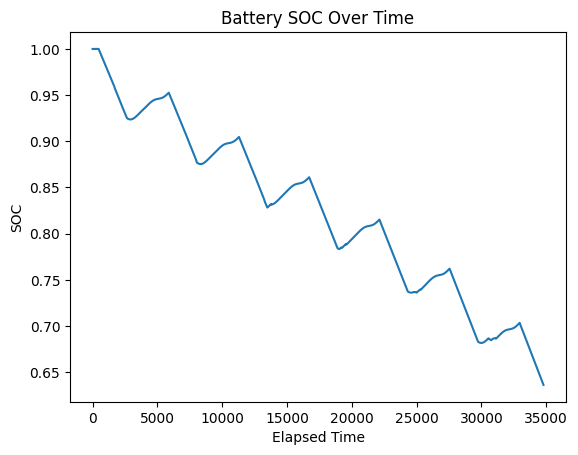

In [15]:
import matplotlib.pyplot as plt

agent = sim_result.agent(sim_result.templated_agents[0])
battery_block = agent.block(name_to_block_id['Battery'])
print(battery_block.summarize())
print(battery_block.stats_to_plot)
# print(battery_block.stats_to_plot)
# block = agent.block('root')
# print(block.summarize())
print(battery_block.variables)
print(list(battery_block.variable(name='soc').values))
print(battery_block.variable(name='soc').elapsed_time)

# plot battery SOC  fancy
plt.plot(battery_block.variable(name='soc').elapsed_time, list(battery_block.variable(name='soc').values))
plt.xlabel('Elapsed Time')
plt.ylabel('SOC')
plt.title('Battery SOC Over Time')
plt.show()



# print(battery_block.variable(name='soc').value_at(mjd=60720.380833334325))







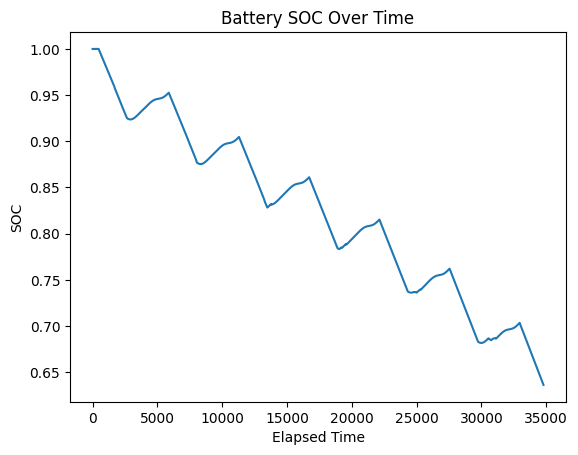

In [16]:
plt.plot(battery_block.variable(name='soc').elapsed_time, list(battery_block.variable(name='soc').values))
plt.xlabel('Elapsed Time')
plt.ylabel('SOC')
plt.title('Battery SOC Over Time')
plt.show()
